## Imports

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

import random

import pickle

## Data Visualisation

In [80]:
CATEGORIES = ["parrot", "blob"]
DATADIR = 'blob-parrot'

IMG_SIZE = 150

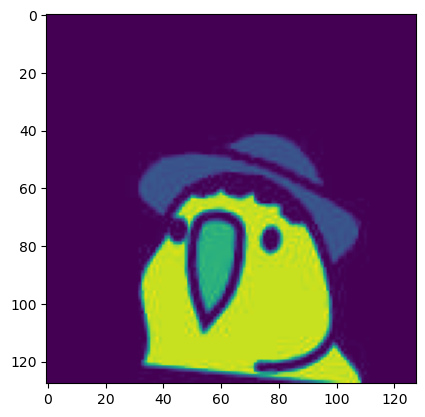

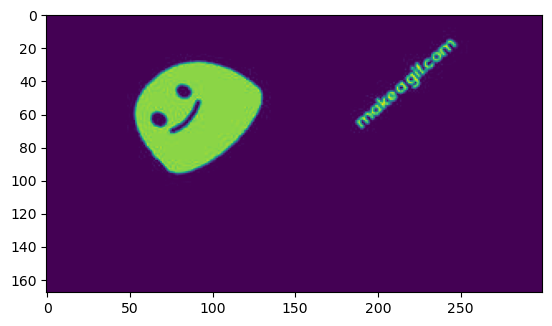

In [79]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path to parrot and blob
    for img in os.listdir(path):  # iterate over each image per parrots and blobs
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert image to array
        plt.imshow(img_array, cmap='gray')  # plot the image
        plt.show()  # display!

        break  # we just want one for now so break

## Data Augmentation

#### Parrot data augmentation

In [47]:
my_images = os.listdir('/Users/ananyagupta/Downloads/computer_vision_hackpack/blob-parrot/parrot')
datagen = ImageDataGenerator(rotation_range=90, horizontal_flip=True)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):  
        img = load_img('/Users/ananyagupta/Downloads/computer_vision_hackpack/blob-parrot/parrot/' + image_name)
        data = img_to_array(img)
        samples = expand_dims(data, 0)
        it = datagen.flow(samples, batch_size=1, save_to_dir= r'augmented_data/parrot', 
                          save_prefix='dr',
                          save_format='jpg')
        
    for batch in it:    
        i += 1    
        if i > 50:        
            break

#### Blob data augmentation

In [48]:
my_images = os.listdir('/Users/ananyagupta/Downloads/computer_vision_hackpack/blob-parrot/blob')
datagen = ImageDataGenerator(rotation_range=90, horizontal_flip=True)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):  
        img = load_img('/Users/ananyagupta/Downloads/computer_vision_hackpack/blob-parrot/blob/' + image_name)
        data = img_to_array(img)
        samples = expand_dims(data, 0)
        it = datagen.flow(samples, batch_size=1, save_to_dir= r'augmented_data/blob', 
                          save_prefix='dr',
                          save_format='jpg')
        
    for batch in it:    
        i += 1    
        if i > 50:        
            break

## Data Pre-processing

In [49]:
DATADIR = "/Users/ananyagupta/Downloads/computer_vision_hackpack/augmented_data"  ##the new datadir is the path for our augmented data
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████| 1051/1051 [00:00<00:00, 1137.65it/s]

2282


In [51]:
random.shuffle(training_data)

In [52]:
##to show that it is indeed shuffled
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
1
1
0
0
0
1


In [53]:
##putting the data into features and labels
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [56]:
## Ensure that pickle is downloaded and imported

## This creates two files in your main folder- X.pickle and y.pickle, which makes it easy to import your data and train a model on it! 

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

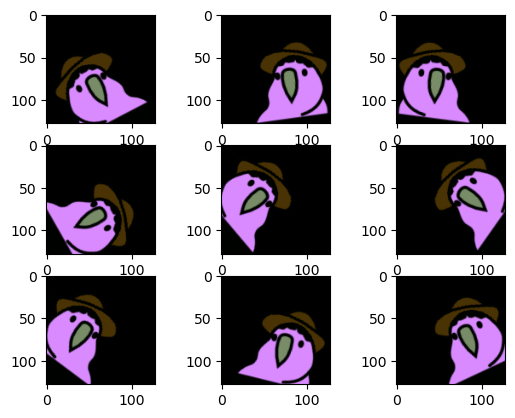

In [78]:
## Visualising your data augmentation
## Source- https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

# load the image 
img = load_img('enter the pathname for some image in your dataset')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90, horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

## The Model

You can implement the model either on your local jupyter notebook or another platform such as Google Collab. If you wish to implement this in collab, you just need to upload your pickle files to a collab notebook and copy-paste the rest of this code to train a model! Be sure to download the end model to your local computer at the end. 

In [ ]:
## Imports kept seperate in case one wishes to train this on, for example, Google Collab instead

import pickle
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [59]:
x_in = open("X.pickle","rb")
X = pickle.load(x_in)
y_in = open("y.pickle","rb")
y = pickle.load(y_in)

In [60]:
X = np.array(X)
y = np.array(y)
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

In [61]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, 
                      y,
                      batch_size=32,
                      epochs=25,
                      validation_split=0.3,
                      callbacks=[tensorboard])

3-conv-64-nodes-0-dense-1672391075
Metal device set to: Apple M1


2022-12-30 14:34:36.063290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-30 14:34:36.065189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/25


2022-12-30 14:34:37.311724: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-30 14:34:37.684847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 5.3575 - accuracy: 0.8403

2022-12-30 14:34:45.945838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 9s 131ms/step - loss: 5.3575 - accuracy: 0.8403 - val_loss: 0.1290 - val_accuracy: 0.9577
Epoch 2/25
50/50 [==============================] - 6s 112ms/step - loss: 0.0684 - accuracy: 0.9712 - val_loss: 0.0785 - val_accuracy: 0.9796
Epoch 3/25
50/50 [==============================] - 6s 114ms/step - loss: 0.0235 - accuracy: 0.9912 - val_loss: 0.0494 - val_accuracy: 0.9898
Epoch 4/25
50/50 [==============================] - 6s 111ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0608 - val_accuracy: 0.9883
Epoch 5/25
50/50 [==============================] - 6s 112ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0573 - val_accuracy: 0.9912
Epoch 6/25
50/50 [==============================] - 6s 115ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9912
Epoch 7/25
50/50 [==============================] - 5s 109ms/step - loss: 9.8813e-04 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9927
Epoch 8/25
50

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [62]:
model.save('Parrot-Blob-CNN.model')

INFO:tensorflow:Assets written to: Parrot-Blob-CNN.model/assets


INFO:tensorflow:Assets written to: Parrot-Blob-CNN.model/assets


## Making predictions

In [63]:
import cv2
import tensorflow as tf

class_category = ["Parrot", "Blob"]
model = tf.keras.models.load_model('Parrot-Blob-CNN.model')

In [76]:
def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

def predict(filepath):
    prediction = model.predict([prepare(filepath)])
    img_array = cv2.imread(filepath)  # convert image to array
    print(prediction[0][0],'\n')
    print(class_category[int(prediction[0][0] > 0.5)])
    plt.imshow(img_array)  # plot the image
    plt.show()
    return prediction

1/1 [==============================] - 0s 39ms/step
0.0 

Parrot


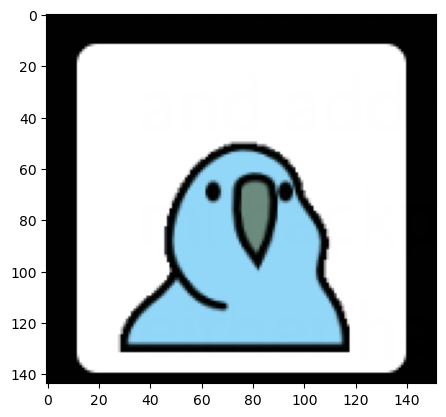

array([[0.]], dtype=float32)

In [77]:
predict('/Users/ananyagupta/Desktop/Screenshot 2022-12-30 at 4.02.21 PM.png')